<a href="https://colab.research.google.com/github/SanjibSarkarU/colab-NN/blob/main/stat2lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pmdarima

In [ ]:
!pip install tensorflow-gpu

In [ ]:
!pip install statsmodel

In [4]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns


#from datetime import datetime

In [180]:
df = pd.read_csv('20220222_153859_hlc.csv', skiprows=1)
df = df.rename(columns={"Latitude (Deg N)": 'lat', "Longitude (Deg W)": 'lng'}, errors="raise")
df = df.loc[(df['lat'] != 0)]

In [ ]:
df.tail(5)
# len(df.lat)

In [181]:
df = df.drop([i for i in range(84, 12500)], axis =0)
# plt.plot(df['lng'], df['lat'])

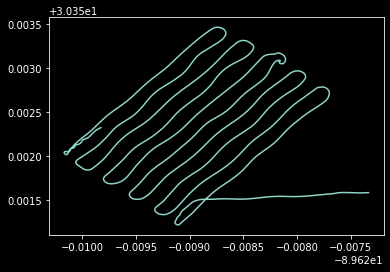

In [182]:
df = df.drop([i for i in range(13800, 24532)], axis =0)
plt.plot(df['lng'], df['lat'])

In [179]:
len(df.lat)

1310

In [206]:
from pmdarima.arima import ADFTest

df_sub=df.drop(columns=list(df)[6:])
df_sub = df_sub.drop(columns=list(df)[0:1])
df_sub = df_sub.drop(columns=list(df)[2:4])
df_sub = df_sub.drop(columns='lng')
# df_sub
# df_sub.dtypes
# df_sub['Time'] = pd.to_datetime(df_sub['Time'])
# df_sub.set_index('Time', inplace=True) 
# df_sub

In [208]:
from statsmodels.tsa.stattools import adfuller
adf, pvalue, usedlag_, nobs_, critical_values_, icbest_ = adfuller(df_sub['lat'])
pvalue

0.003450033167529102

In [209]:
#Extract and plot trend, seasonal and residuals. 
from statsmodels.tsa.seasonal import seasonal_decompose 
decomposed = seasonal_decompose(df_sub['lat'], model ='additive', period=1)

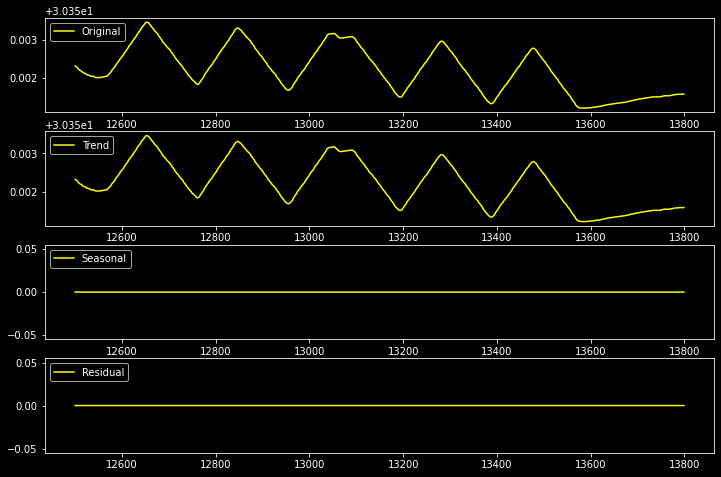

In [210]:
trend = decomposed.trend
seasonal = decomposed.seasonal
residual = decomposed.resid

plt.style.use('dark_background')
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(df_sub['lat'], label='Original', color='yellow')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend', color='yellow')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal', color='yellow')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residual', color='yellow')
plt.legend(loc='upper left')
plt.show()

In [211]:
from pmdarima.arima import auto_arima
# from statsmodel.tsa.stattools import acf

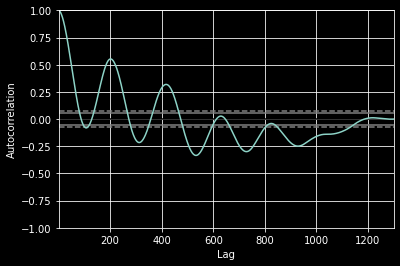

In [212]:
# acf_ = acf(df.lat, nlags=90)
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df_sub.lat)

In [213]:
arima_model = auto_arima(df_sub['lat'], start_p = 1, d=1, start_q = 1, 
                          max_p = 5, max_q = 5, max_d=5, m = 0, 
                          start_P = 0, D=1, start_Q=0, max_P=5, max_D=5, max_Q=5,
                          seasonal = False, 
                          trace = True, 
                          error_action ='ignore',   
                          suppress_warnings = True,  
                          stepwise = True, n_fits=10)    

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-27166.860, Time=3.72 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-25213.859, Time=0.24 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-27119.101, Time=0.47 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-25829.898, Time=1.27 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-25210.896, Time=0.12 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-27175.147, Time=3.30 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-27130.558, Time=0.67 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-27257.842, Time=1.09 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-27147.736, Time=0.81 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-27269.325, Time=1.86 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-27150.737, Time=1.04 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=-27266.884, Time=2.26 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-27153.834, Time=1.51 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-27150.972, Time=1.56 sec
 ARIM

In [ ]:
# To print the summary 
print(arima_model.summary() ) #Note down the Model and details.

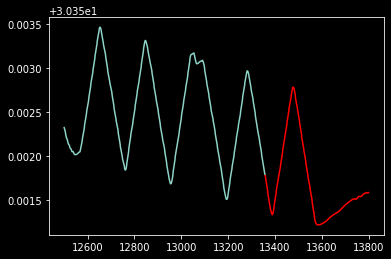

In [233]:
#Split data into train and test
size = int(len(df_sub) * 0.66)
X_train, X_test = df_sub.lat[0:size], df_sub.lat[size:len(df_sub)]
plt.plot(X_train)
plt.plot(X_test,'r')

In [234]:
from statsmodels.tsa.statespace.sarimax import SARIMAX 
  
model = SARIMAX(X_train,  
                order = (5,1,0),  
                seasonal_order =(0,0,0, 0))
  
result = model.fit() 
result.summary() 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    lat   No. Observations:                  858
Model:               SARIMAX(5, 1, 0)   Log Likelihood                9066.212
Date:                Sat, 19 Mar 2022   AIC                         -18120.424
Time:                        17:25:06   BIC                         -18091.903
Sample:                             0   HQIC                        -18109.503
                                - 858                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3786   2.67e-20   1.42e+19      0.000       0.379       0.379
ar.L2          0.2723   6.56e-22   4.15e+20      0.000       0.272       0.272
ar.L3          0.1696   5.17e-21   3.28e+19      0.000       0.170       0.170
ar.L4          0.1018   1.13e-20   8.98e+18      0.000       0.102       0.102
ar.L5          0.0459    1.5e-20   3.07e+18      0.000       0.046       0.046
sigma2      6.378e-11   6.73e-11      0.948      0.343   -6.81e-11    1.96e-10
===================================================================================
Ljung-Box (L1) (Q):                  58.87   Jarque-Bera (JB):               447.58
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.00   Skew:                             0.17
Prob(H) (two-sided):                  0.97   Kurtosis:                         6.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

In [241]:
#Train prediction
start_index = 0
end_index = len(X_train)-1
train_prediction = result.predict(start_index, end_index) 
xaxis = [i for i in range(len(train_prediction))]

In [243]:
train_prediction

12500     0.000000
12501    30.352322
12502    30.352305
12503    30.352296
12504    30.352286
           ...    
13353    30.351838
13354    30.351824
13355    30.351812
13356    30.351799
13357    30.351787
Name: predicted_mean, Length: 858, dtype: float64

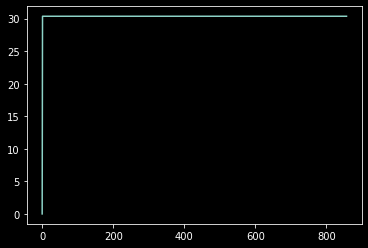

In [242]:
plt.plot(xaxis, train_prediction)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


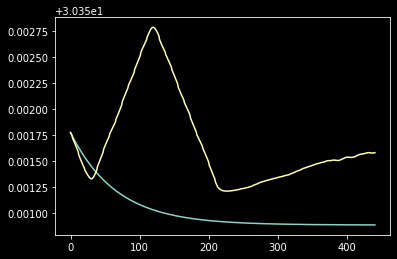

In [225]:
#Prediction
start_index = len(X_train)
end_index = len(df_sub)-1
prediction = result.predict(start_index, end_index).rename('Predictedlat') 
#Rename the column
xaxis = [i for i in range(len(prediction))]
# plot predictions and actual values 
plt.plot(xaxis, prediction)
plt.plot(xaxis, X_test)
# prediction.plot(legend = True) 
# X_test['lat'].plot(legend = True) 

In [13]:
#Variables for training
cols = list(df)[4:5]
# print(cols)


In [14]:
#New dataframe with only training data - 5 columns
df_for_training = df[cols].astype(np.float64)

In [15]:
df_for_training

,lat
84,30.366409
85,30.366408
86,30.366407
87,30.366405
88,30.366404
...,...
24527,30.352580
24528,30.352580
24529,30.352580
24530,30.352581


In [16]:
df_for_training.shape[1]

1

In [17]:
#LSTM uses sigmoid and tanh that are sensitive to magnitude so values need to be normalized
# normalize the dataset
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)

In [18]:
df_for_training_scaled

array([[13.44986613],
       [13.44901803],
       [13.44719796],
       ...,
       [ 0.27205638],
       [ 0.27263766],
       [ 0.27299977]])

In [19]:
#As required for LSTM networks, we require to reshape an input data into n_samples x timesteps x n_features. 
#In this example, the n_features is 5. We will make timesteps = 14 (past days data used for training). 

#Empty lists to be populated using formatted training data
trainX = []
trainY = []

n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 14  # Number of past days we want to use to predict the future.

#Reformat input data into a shape: (n_samples x timesteps x n_features)
#In my example, my df_for_training_scaled has a shape (12823, 5)
#12823 refers to the number of data points and 5 refers to the columns (multi-variables).
for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future,0])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (24434, 14, 1).
trainY shape == (24434, 1).


In [20]:
trainX.shape[0], trainX.shape[1], trainX.shape[2]

(24434, 14, 1)

In [ ]:
print(trainY)


In [ ]:
trainX

In [21]:
# define the Autoencoder model

model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 14, 64)            16896     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 29,345
Trainable params: 29,345
Non-trainable params: 0
_________________________________________________________________


In [22]:
# fit the model
history = model.fit(trainX, trainY, epochs=5, batch_size=16, validation_split=0.1, verbose=1)

Epoch 1/5
1375/1375 [==============================] - 77s 53ms/step - loss: 0.1894 - val_loss: 9.6481e-04
Epoch 2/5
1375/1375 [==============================] - 73s 53ms/step - loss: 0.0731 - val_loss: 5.1540e-04
Epoch 3/5
1375/1375 [==============================] - 73s 53ms/step - loss: 0.0599 - val_loss: 3.5500e-04
Epoch 4/5
1375/1375 [==============================] - 73s 53ms/step - loss: 0.1147 - val_loss: 5.3150e-04
Epoch 5/5
1375/1375 [==============================] - 72s 52ms/step - loss: 0.0518 - val_loss: 2.4904e-04


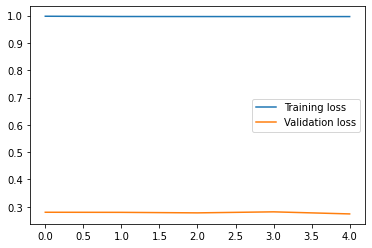

In [75]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

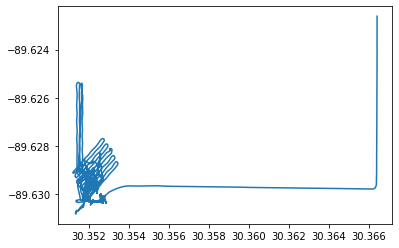

In [76]:
original = df[['lat', 'lng']]
plt.plot(original['lat'], original['lng'])

In [23]:
trainX[-n_days_for_prediction:]

NameError: ignored

In [79]:
#Make prediction
n_days_for_prediction = 90
prediction = model.predict(trainX[-n_days_for_prediction:])
prediction

array([[0.00585617, 0.0161027 ],
       [0.00585081, 0.01610572],
       [0.00584564, 0.01610868],
       [0.0058411 , 0.01611148],
       [0.00583667, 0.01611427],
       [0.00583246, 0.01611707],
       [0.00582818, 0.01611991],
       [0.0058231 , 0.01612325],
       [0.00581517, 0.01612814],
       [0.00580461, 0.0161344 ],
       [0.00579209, 0.01614182],
       [0.00577999, 0.01614921],
       [0.00576858, 0.01615647],
       [0.00575861, 0.01616306],
       [0.00575091, 0.01616852],
       [0.00574464, 0.01617326],
       [0.00574052, 0.01617679],
       [0.00573765, 0.0161796 ],
       [0.00573591, 0.01618152],
       [0.00573388, 0.01618343],
       [0.00573128, 0.01618562],
       [0.00572731, 0.0161885 ],
       [0.0057227 , 0.01619163],
       [0.00571924, 0.01619413],
       [0.00571668, 0.0161961 ],
       [0.0057156 , 0.01619719],
       [0.0057144 , 0.01619824],
       [0.00571262, 0.01619954],
       [0.00571134, 0.01620053],
       [0.0057111 , 0.01620093],
       [0.

In [83]:
prediction = pd.DataFrame(y_pred_future, columns =('lat_p', 'lng_p'))
y_pred_future = scaler.inverse_transform(prediction)
# df_forecast = pd.DataFrame(y_pred_future, columns =('lat_p', 'lng_p'))
y_pred_future

array([[ 30.38418 , -89.695694],
       [ 30.38418 , -89.695694],
       [ 30.38418 , -89.695694],
       [ 30.38418 , -89.695694],
       [ 30.38418 , -89.695694],
       [ 30.38418 , -89.695694],
       [ 30.38418 , -89.695694],
       [ 30.38418 , -89.695694],
       [ 30.38418 , -89.695694],
       [ 30.38418 , -89.695694],
       [ 30.38418 , -89.695694],
       [ 30.38418 , -89.695694],
       [ 30.38418 , -89.695694],
       [ 30.38418 , -89.695694],
       [ 30.38418 , -89.695694],
       [ 30.38418 , -89.695694],
       [ 30.38418 , -89.695694],
       [ 30.38418 , -89.695694],
       [ 30.38418 , -89.695694],
       [ 30.38418 , -89.695694],
       [ 30.38418 , -89.695694],
       [ 30.38418 , -89.695694],
       [ 30.38418 , -89.695694],
       [ 30.38418 , -89.695694],
       [ 30.38418 , -89.695694],
       [ 30.38418 , -89.695694],
       [ 30.38418 , -89.695694],
       [ 30.38418 , -89.695694],
       [ 30.38418 , -89.695694],
       [ 30.38418 , -89.695694],
       [ 3

In [ ]:
df_for = scaler.transform(df_forecast)
df_for

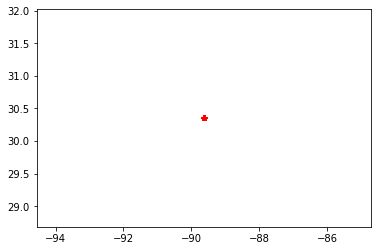

In [57]:
plt.plot(df_forecast['lng_p'], df_forecast['lat_p'], 'r*')